# 1-D Exploratory Data Analysis

In this notebook, do some EDA in one dimension. Pick a column  (or a set of columns) you're interested in looking at. Calculate some summary statistics (like mean,median,min,max,sd). Then, make some plots to visualize the distribution of the data. Distirbution plots include things like histograms, boxplots, dotplots, beeswarms, and violin plots. Review [ggplot-intro](https://github.com/data4news/ggplot-intro) for examples of these kinds of distribution plots.

### Standard Python and R imports

In [3]:

%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R
hiv_socio <- read.csv("texas_hiv_socioeconomic.csv")
uninsured <- read.csv("texas_uninsured.csv")

In [9]:
%%R
library(dplyr)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ ggplot2   3.5.1     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [33]:
%%R
combined_data <- read.csv("texas_complete_data.csv")


In [35]:
%%R
print(colnames(combined_data))

 [1] "county"                     "X..HIV.Cases"              
 [3] "County.Value.."             "GEOID"                     
 [5] "unemployment_rate"          "less_than_hs"              
 [7] "hs_only"                    "some_college_or_associates"
 [9] "bachelors_or_higher"        "poverty_rate"              
[11] "uninsured_count"            "uninsured_percent"         
[13] "uninsured_error_margin"     "uninsured_zscore"          


In [3]:
%%R

# My commonly used R imports
library(dplyr)
library(ggplot2)
library(sf)
library(tigris)
require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ lubridate 1.9.4     ✔ tibble    3.2.1
✔ purrr     1.0.2     ✔ tidyr     1.3.1
✔ readr     2.1.5     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors



Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE
To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.
Loading required package: tidyverse


## Load the data

In [4]:
%%R
 
# Import data with R
df <- read_csv('texas_hiv_socioeconomic.csv', show_col_types = FALSE)
df %>% head(4)

# A tibble: 4 × 11
  county   `# HIV Cases` `County Value**` GEOID unemployment_rate uninsured_rate
  <chr>            <dbl>            <dbl> <dbl>             <dbl>          <dbl>
1 Anderson           297              586 48001              3.23           5.11
2 Andrews             16              112 48003              3.74           5.86
3 Angelina           185              260 48005              6.63           7.15
4 Aransas             36              169 48007              7.47           6.54
# ℹ 5 more variables: less_than_hs <dbl>, hs_only <dbl>,
#   some_college_or_associates <dbl>, bachelors_or_higher <dbl>,
#   poverty_rate <dbl>


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 40 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`). 



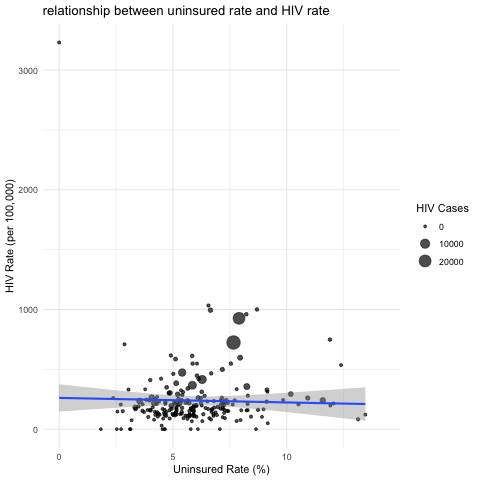

In [5]:
%%R
ggplot(df, aes(x = uninsured_rate, y = `County Value**`)) +
  geom_point(aes(size = `# HIV Cases`), alpha = 0.7) +
  geom_smooth(method = "lm", se = TRUE) +
  labs(title = "relationship between uninsured rate and HIV rate",
       x = "Uninsured Rate (%)",
       y = "HIV Rate (per 100,000)",
       size = "HIV Cases") +
  theme_minimal()

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`). 



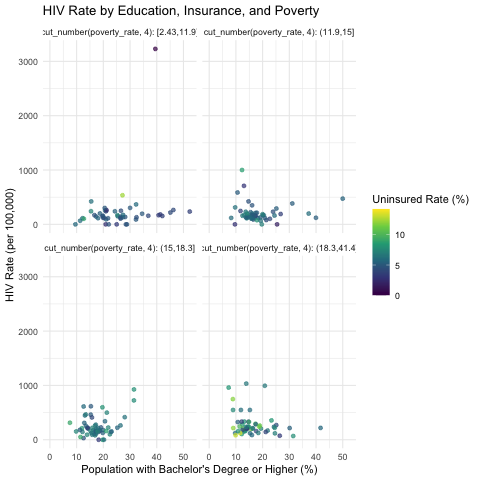

In [6]:
%%R
ggplot(df, aes(x = bachelors_or_higher, y = `County Value**`)) +
  geom_point(aes(color = uninsured_rate), alpha = 0.7) +
  scale_color_viridis_c() +
  facet_wrap(~cut_number(poverty_rate, 4), labeller = label_both) +
  labs(title = "HIV Rate by Education, Insurance, and Poverty",
       x = "Population with Bachelor's Degree or Higher (%)",
       y = "HIV Rate (per 100,000)",
       color = "Uninsured Rate (%)") +
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 40 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`). 



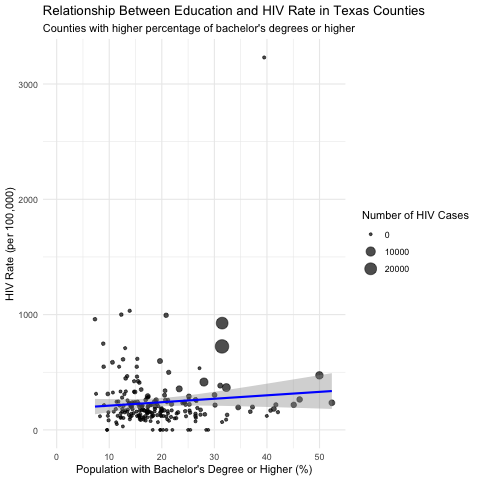

In [7]:
%%R
ggplot(df, aes(x = bachelors_or_higher, y = `County Value**`)) +
  geom_point(aes(size = `# HIV Cases`), alpha = 0.7) +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(title = "Relationship Between Education and HIV Rate in Texas Counties",
       subtitle = "Counties with higher percentage of bachelor's degrees or higher",
       x = "Population with Bachelor's Degree or Higher (%)",
       y = "HIV Rate (per 100,000)",
       size = "Number of HIV Cases") +
  theme_minimal()


## Summary statistics

Pick a column or set of columns and calculate some summary statistics (like mean,median,min,max,sd).
Hint, you may want to use `group_by` and `summarize`.



In [8]:
%%R 
df <- df %>%
  mutate(education_quartile = ntile(bachelors_or_higher, 4))
df <- df %>%
  mutate(education_group = case_when(
    education_quartile == 1 ~ "Q1 (lowest education)",
    education_quartile == 2 ~ "Q2",
    education_quartile == 3 ~ "Q3",
    education_quartile == 4 ~ "Q4 (highest education)"
  ))
# code for summary statistics

education_summary <- df %>%
  group_by(education_group) %>%
  summarize(
    count = n(),
    mean_hiv_rate = mean(`County Value**`, na.rm = TRUE),
    median_hiv_rate = median(`County Value**`, na.rm = TRUE),
    min_hiv_rate = min(`County Value**`, na.rm = TRUE),
    max_hiv_rate = max(`County Value**`, na.rm = TRUE),
    sd_hiv_rate = sd(`County Value**`, na.rm = TRUE),
    mean_education = mean(bachelors_or_higher, na.rm = TRUE),
    mean_uninsured = mean(uninsured_rate, na.rm = TRUE)
  ) %>%
  arrange(education_quartile = factor(education_group, 
                                    levels = c("Q1 (lowest education)", 
                                              "Q2", "Q3", 
                                              "Q4 (highest education)")))


In [9]:
%%R 
tx_counties <- counties(state = "TX", cb = TRUE)
df$GEOID <- as.character(df$GEOID)

  |======================================================================| 100%


Retrieving data for the year 2022
Using FIPS code '48' for state 'TX'


In [10]:
%%R 
map_data <- tx_counties %>%
  left_join(df, by = c("GEOID" = "GEOID"))

In [11]:
%%R
map_data <- tx_counties %>%
  left_join(df, by = c("GEOID" = "GEOID"))


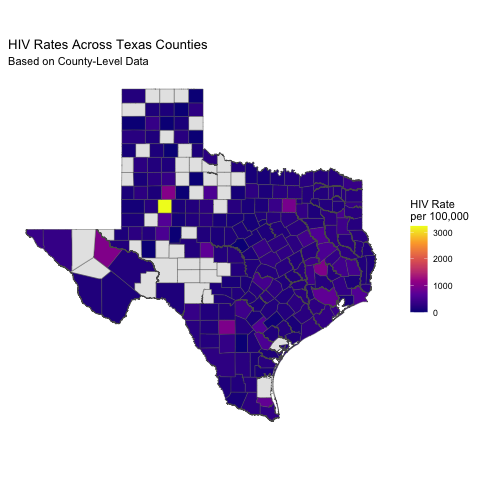

In [12]:
%%R
ggplot() +
  geom_sf(data = map_data, aes(fill = `County Value**`)) +
  scale_fill_viridis_c(option = "plasma", 
                      name = "HIV Rate\nper 100,000",
                      na.value = "grey90") +
  labs(title = "HIV Rates Across Texas Counties",
       subtitle = "Based on County-Level Data") +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.ticks = element_blank(),
    panel.grid = element_blank()
  )

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 40 rows containing non-finite outside the scale range
(`stat_boxplot()`). 



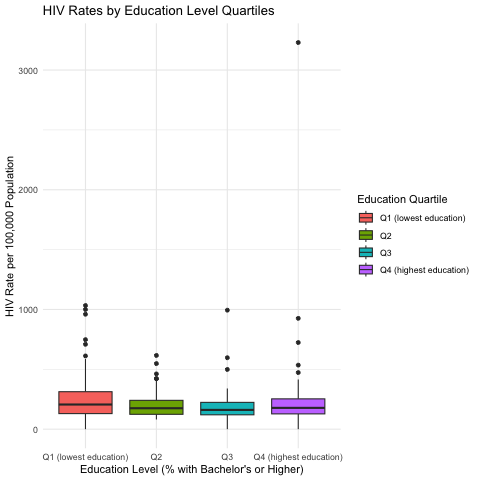

In [13]:
%%R
ggplot(df, aes(x = education_group, y = `County Value**`)) +
  geom_boxplot(aes(fill = education_group)) +
  labs(title = "HIV Rates by Education Level Quartiles",
       x = "Education Level (% with Bachelor's or Higher)",
       y = "HIV Rate per 100,000 Population",
       fill = "Education Quartile") +
  theme_minimal()

## 1-D visualizations (aka distributions)


### Continus variables

For each continuous variable you are interested in, use ggplot to make a plot of the distribution. You can use histograms, dot plots, box plots, beeswarms, etc...(whichever chart type you found most useful). Learn about that variable and give each chart a headline that explains what you're seeing. The chart can also show the mean or median of the variable for reference (for example for a histogram you can add a vertical line through the median).

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 53 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 53 rows containing missing values or values outside the scale range
(`geom_point()`). 



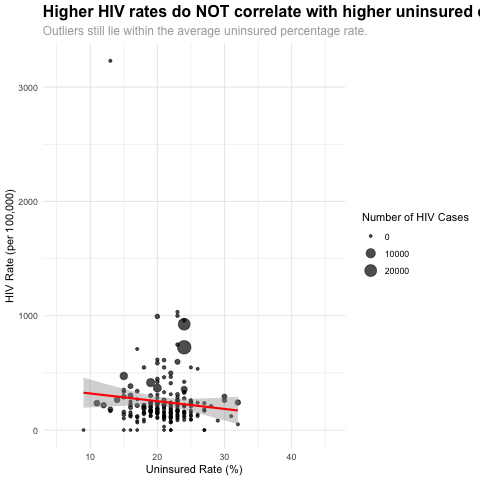

In [38]:
%%R
ggplot(combined_data, aes(x = uninsured_percent, y = County.Value..)) +
  geom_point(aes(size = X..HIV.Cases), alpha = 0.7) +
  geom_smooth(method = "lm", se = TRUE, color = "red") +
  labs(
    title = "Higher HIV rates do NOT correlate with higher uninsured communities",
    subtitle = "Outliers still lie within the average uninsured percentage rate.",
    x = "Uninsured Rate (%)",
    y = "HIV Rate (per 100,000)",
    size = "Number of HIV Cases"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12, color = "darkgray")
  )

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 40 rows containing non-finite outside the scale range (`stat_bin()`). 



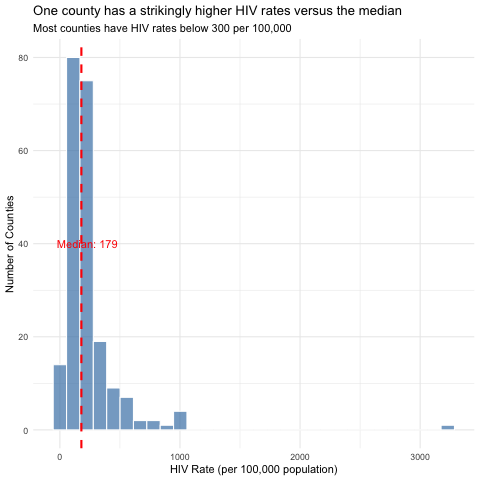

In [41]:
%%R
ggplot(combined_data, aes(x = County.Value..)) +
  geom_histogram(bins = 30, fill = "steelblue", color = "white", alpha = 0.7) +
  geom_vline(xintercept = median(combined_data$County.Value.., na.rm = TRUE), 
             color = "red", linetype = "dashed", linewidth = 1) +
  annotate("text", x = median(combined_data$County.Value.., na.rm = TRUE) + 50, 
           y = 40, label = paste("Median:", round(median(combined_data$County.Value.., na.rm = TRUE), 1)), 
           color = "red") +
  labs(title = "One county has a strikingly higher HIV rates versus the median",
       subtitle = "Most counties have HIV rates below 300 per 100,000",
       x = "HIV Rate (per 100,000 population)",
       y = "Number of Counties") +
  theme_minimal()

In [20]:
%%R
colnames(df)

 [1] "county"                     "# HIV Cases"               
 [3] "hiv_rate"                   "GEOID"                     
 [5] "unemployment_rate"          "uninsured_rate"            
 [7] "less_than_hs"               "hs_only"                   
 [9] "some_college_or_associates" "bachelors_or_higher"       
[11] "poverty_rate"               "education_quartile"        
[13] "education_group"           


`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 40 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 40 rows containing missing values or values outside the scale range
(`geom_point()`). 



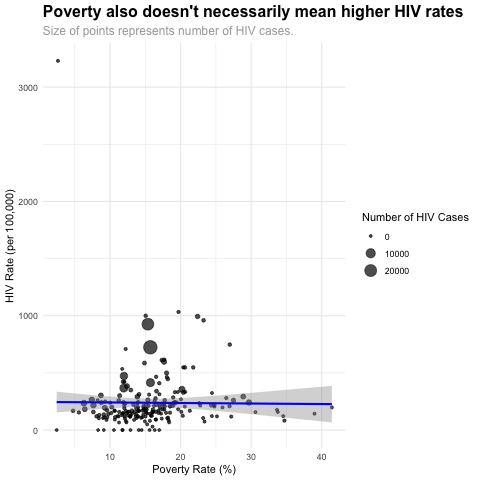

In [43]:
%%R
ggplot(combined_data, aes(x = poverty_rate, y = County.Value..)) +
  geom_point(aes(size = X..HIV.Cases), alpha = 0.7) +
  geom_smooth(method = "lm", se = TRUE, color = "blue") +
  labs(
    title = "Poverty also doesn't necessarily mean higher HIV rates",
    subtitle = "Size of points represents number of HIV cases.",
    x = "Poverty Rate (%)",
    y = "HIV Rate (per 100,000)",
    size = "Number of HIV Cases"
  ) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 16, face = "bold"),
    plot.subtitle = element_text(size = 12, color = "darkgray")
  )

### Discrete Variables

If there are any discrete variables you'd like to analyze, you can do that with charts here.

In [ ]:
# code for plot 1

#I'm not sure if im confused about discrete variables, but the only discrete one i think i have are counties?
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 2
# make sure to make a meaningful title and subtitle

In [ ]:
# code for plot 3
# make sure to make a meaningful title and subtitle